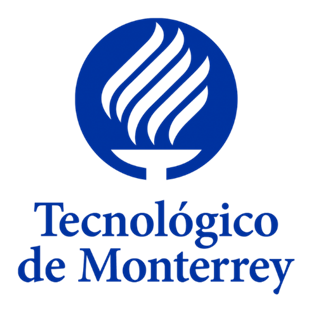 

Instituto Tecnológico y de Estudios Superiores de Monterrey
 

SEMANA 4 - ACTIVIDAD 1
Transformación y reducción de datos
 


Liliana del Pilar Pineda González - A01793685

Ricardo Loor - A01793943


**Parte 1: Ejercicio guiado**

In [1]:
import pandas as pd
import numpy as np

# Principal components analysis (PCA)



In [54]:
Tarjetas = '/content/DatabasePCA.csv'

In [55]:
#Creamos el dataFrame
tarjetas_df = pd.read_csv(Tarjetas)
df = tarjetas_df.copy()
df

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


In [56]:
#Renombrar las columnas
df = df.rename(columns={'X1': 'Given Credit', 'X2': 'Gender', 'X3': 'Education', 'X4': 'Marital Status', 'X5': 'Age', 'X6': 'H_Sept', 'X7': 'H_Aug', 'X8': 'H_Jul', 'X9': 'H_Jun', 'X10': 'H_May', 'X11': 'H_Apr', 'X12': 'BS_September', 'X13': 'BS_Aug', 'X14': 'BS_Jul', 'X15': 'BS_Jun', 'X16': 'BS_May', 'X17': 'BS_Aprl', 'X18': 'PP_September', 'X19': 'PP_Aug', 'X20': 'PP_Jul', 'X21': 'PP_Jun', 'X22': 'PP_May', 'X23': 'PP_Aprl'})
df

,ID,Given Credit,Gender,Education,Marital Status,Age,H_Sept,H_Aug,H_Jul,H_Jun,...,BS_Jun,BS_May,BS_Aprl,PP_September,PP_Aug,PP_Jul,PP_Jun,PP_May,PP_Aprl,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


In [57]:
#Valores antes de eliminar nulos
df.shape

(30000, 25)

In [58]:
#Eliminamos los registros que contengan valores nulos (42 rows)
df.dropna(inplace = True)

In [59]:
#Vemos los valores despues de eliminar nulos
df.shape

(29958, 25)

**Paso 1: Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos**

In [60]:
df = df.drop(["ID", "Gender", "Education", "Marital Status", "H_Sept", "H_Aug", "H_Jul", "H_Jun", "H_May", "H_Apr", "Y"], axis = 1)

In [61]:
df

,Given Credit,Age,BS_September,BS_Aug,BS_Jul,BS_Jun,BS_May,BS_Aprl,PP_September,PP_Aug,PP_Jul,PP_Jun,PP_May,PP_Aprl
0,20000,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,39.0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,150000,43.0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,30000,37.0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,80000,41.0,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


In [62]:
from sklearn.preprocessing import StandardScaler

df = pd.DataFrame(StandardScaler().fit_transform(df))

In [63]:
df = df.rename(columns={'0': 'Given Credit', '1': 'Age', '2': 'BS_September', '3': 'BS_Aug', '4': 'BS_Jul', '5': 'BS_Jun', '6': 'BS_May', '7': 'BS_Aprl', '8': 'PP_September', '9': 'PP_Aug', '10': 'PP_Jul', '11': 'PP_Jun', '12': 'PP_May', '13': 'PP_Aprl'})

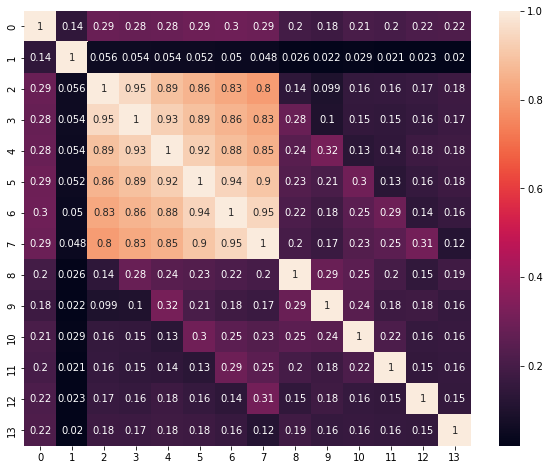

In [64]:
#Revisamos el heatmap de los datos correlacionados

from matplotlib import pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot = True)

In [65]:
from sklearn.decomposition import PCA

In [66]:
#Obtenemos los datos de desviacion standard, variancia y proporcion acumulativa

pcs = PCA()

pcs.fit(df.iloc[::])

pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                          'Proportion of variance': pcs.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)#column 
                          }
                          )
pcsSummary

,Standard deviation,Proportion of variance,Cumulative proportion
0,2.432921,0.422779,0.422779
1,1.309882,0.122552,0.545331
2,1.022269,0.074643,0.619974
3,0.961876,0.066084,0.686058
4,0.940087,0.063124,0.749182
5,0.934241,0.062341,0.811523
6,0.882984,0.055688,0.867211
7,0.852438,0.051902,0.919113
8,0.841041,0.050523,0.969636
9,0.514249,0.018889,0.988525


In [67]:
pcsSummary = pcsSummary.transpose()
pcsSummary.round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Standard deviation,2.43,1.31,1.02,0.96,0.94,0.93,0.88,0.85,0.84,0.51,0.27,0.2,0.16,0.15
Proportion of variance,0.42,0.12,0.07,0.07,0.06,0.06,0.06,0.05,0.05,0.02,0.01,0.0,0.00,0.00
Cumulative proportion,0.42,0.55,0.62,0.69,0.75,0.81,0.87,0.92,0.97,0.99,0.99,1.0,1.00,1.00


In [68]:
import matplotlib as mpl
import matplotlib.pyplot as plt

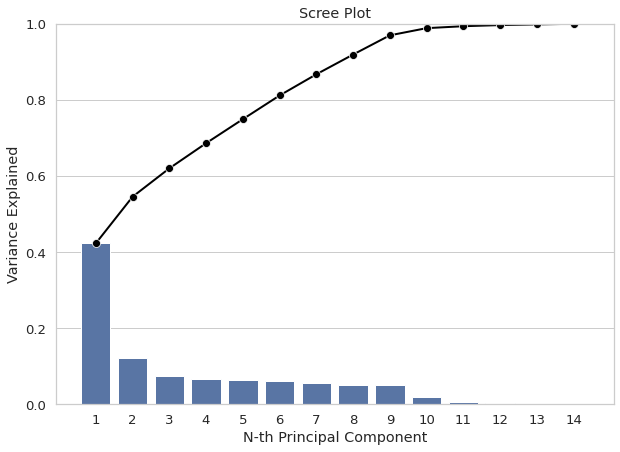

In [69]:
#Graficamos un Scree Plot para conoocer la proporción de la varianza

PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

In [70]:
pcs.components_.round(4) #is the set of all eigenvectors for your projection space (one eigenvector for each principal component).

array([[ 1.655e-01,  3.280e-02,  3.724e-01,  3.833e-01,  3.883e-01,
         3.916e-01,  3.885e-01,  3.807e-01,  1.351e-01,  1.168e-01,
         1.281e-01,  1.169e-01,  1.137e-01,  1.055e-01],
       [ 3.007e-01,  7.190e-02, -1.908e-01, -1.746e-01, -1.269e-01,
        -1.204e-01, -1.059e-01, -9.420e-02,  3.832e-01,  4.084e-01,
         3.923e-01,  3.496e-01,  3.039e-01,  3.235e-01],
       [-3.786e-01, -8.695e-01, -3.420e-02, -1.800e-03,  3.470e-02,
         3.410e-02,  3.390e-02,  1.850e-02,  1.738e-01,  2.009e-01,
         1.221e-01,  6.230e-02, -6.090e-02, -5.090e-02],
       [-2.001e-01,  3.390e-01, -6.390e-02,  7.600e-03,  6.050e-02,
         7.480e-02,  3.960e-02, -7.060e-02,  3.621e-01,  3.457e-01,
         2.447e-01, -9.470e-02, -6.098e-01, -3.657e-01],
       [ 3.530e-02, -3.980e-02,  4.140e-02,  8.320e-02,  1.138e-01,
         2.840e-02, -1.068e-01, -1.650e-01,  2.257e-01,  1.487e-01,
        -2.396e-01, -5.778e-01, -1.934e-01,  6.592e-01],
       [-7.890e-02,  7.150e-02, -4.

In [80]:
#Agregamos nombres a las columnas

pcsSummary.columns = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10", "PC11", "PC12", "PC13", "PC14"]
df.columns = ["Given Credit", "Age","BS_Sep","BS_Aug","BS_Jul","BS_Jun", "BS_May", "BS_Apr","PP_Sep","PP_Aug","PP_Jul","PP_Jun","PP_May","PP_Apr"]

pcsSummary.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Standard deviation,2.4329,1.3099,1.0223,0.9619,0.9401,0.9342,0.8830,0.8524,0.8410,0.5142,0.2665,0.2026,0.1592,0.1525
Proportion of variance,0.4228,0.1226,0.0746,0.0661,0.0631,0.0623,0.0557,0.0519,0.0505,0.0189,0.0051,0.0029,0.0018,0.0017
Cumulative proportion,0.4228,0.5453,0.6200,0.6861,0.7492,0.8115,0.8672,0.9191,0.9696,0.9885,0.9936,0.9965,0.9983,1.0000


**Paso 2: Interpretar cada componente principal en términos de las variables**

In [81]:
#Segun el grafico anterior, elegimos las variables mas importantes (que tienen vrianza de hasta 90%)

pcTranspose = pd.DataFrame(pcs.components_.transpose(), columns = pcsSummary.columns, index = df.iloc[::].columns)

remainPCA = pcTranspose.drop(["PC7", "PC8", "PC9", "PC10", "PC11", "PC12", "PC13", "PC14"], axis = 1)
remainPCA

,PC1,PC2,PC3,PC4,PC5,PC6
Given Credit,0.165507,0.300709,-0.378575,-0.200103,0.035312,-0.078883
Age,0.032789,0.071906,-0.869471,0.338990,-0.039760,0.071461
BS_Sep,0.372446,-0.190793,-0.034207,-0.063899,0.041391,-0.043987
BS_Aug,0.383253,-0.174644,-0.001814,0.007629,0.083164,-0.028824
BS_Jul,0.388264,-0.126883,0.034747,0.060528,0.113790,0.099239
BS_Jun,0.391557,-0.120403,0.034073,0.074774,0.028378,0.014527
BS_May,0.388505,-0.105928,0.033882,0.039553,-0.106756,-0.099290
BS_Apr,0.380672,-0.094157,0.018489,-0.070616,-0.164986,0.069272
PP_Sep,0.135120,0.383194,0.173845,0.362055,0.225652,0.040574
PP_Aug,0.116768,0.408391,0.200925,0.345745,0.148714,0.408361


**Paso 3: Identificar valores atípicos**

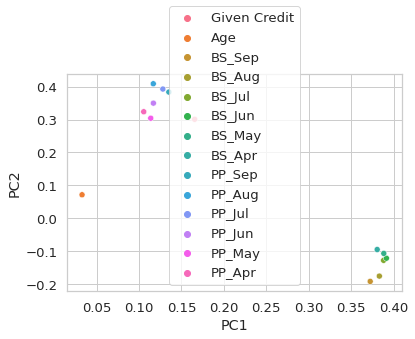

In [84]:
#Identificamos valores atipicos con scatterplot

sns.scatterplot(data = pcTranspose, x = "PC1", y = "PC2", hue = pcTranspose.index)

[]

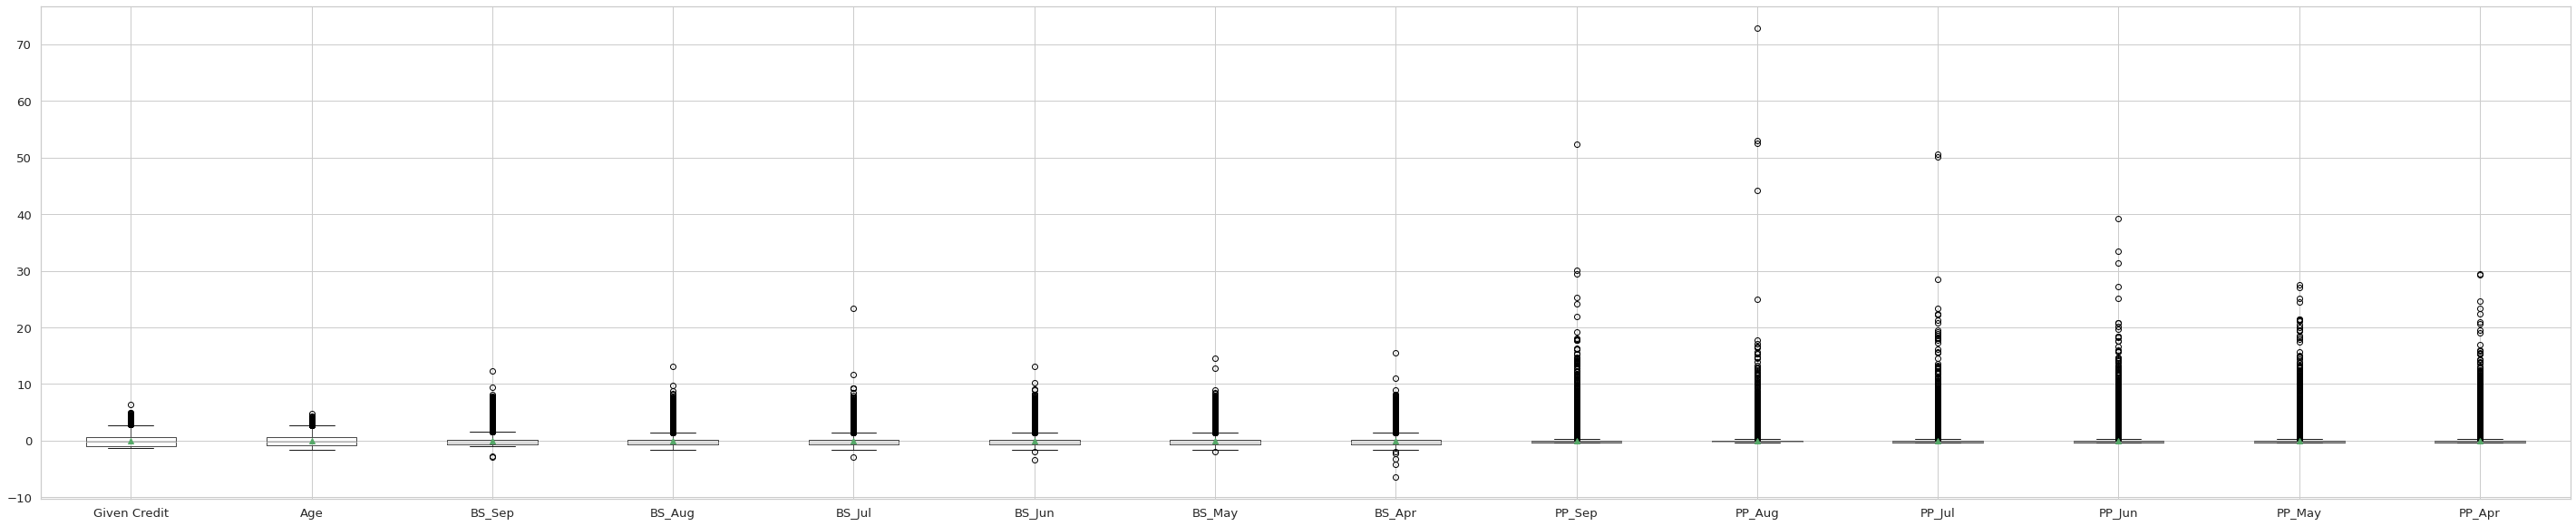

In [91]:
#Obtenemos el boxplot de la base de datos inicial

from seaborn.categorical import boxplot
dfColumns = df.columns.to_list()
boxplot = df.boxplot(figsize=(50, 10), column = dfColumns, labels = dfColumns, showmeans = True)
boxplot.plot()

[]

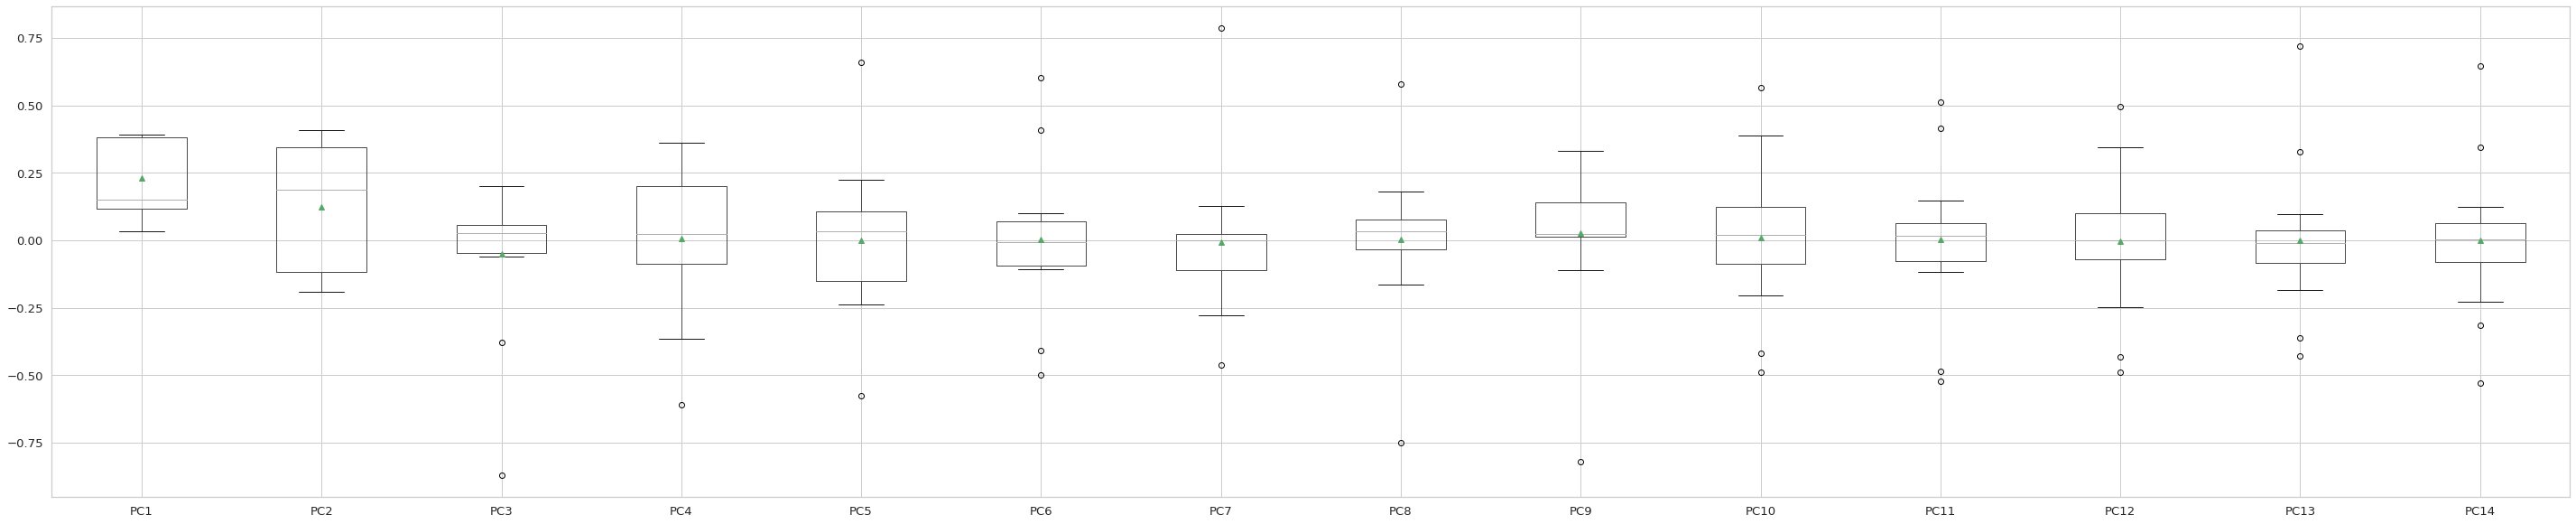

In [96]:
#Obtenemos el boxplot del PCA transpuesto

remainPCACol = pcTranspose.columns.to_list()
boxplot = pcTranspose.boxplot(figsize=(50, 10), column = remainPCACol, labels = remainPCACol, showmeans = True)
boxplot.plot()

In [102]:
#Imprimos los Maximos y minimos de los diferentes PCs

print("PC1 --> Min: ", pcTranspose.PC1.abs().idxmin(), ", Max: ", pcTranspose.PC1.abs().idxmax())
print("PC2 --> Min: ", pcTranspose.PC2.abs().idxmin(), ", Max: ", pcTranspose.PC2.abs().idxmax())
print("PC3 --> Min: ", pcTranspose.PC3.abs().idxmin(), ", Max: ", pcTranspose.PC3.abs().idxmax())
print("PC4 --> Min: ", pcTranspose.PC4.abs().idxmin(), ", Max: ", pcTranspose.PC4.abs().idxmax())
print("PC5 --> Min: ", pcTranspose.PC5.abs().idxmin(), ", Max: ", pcTranspose.PC5.abs().idxmax())
print("PC6 --> Min: ", pcTranspose.PC6.abs().idxmin(), ", Max: ", pcTranspose.PC6.abs().idxmax())
print("PC7 --> Min: ", pcTranspose.PC7.abs().idxmin(), ", Max: ", pcTranspose.PC7.abs().idxmax())
print("PC8 --> Min: ", pcTranspose.PC8.abs().idxmin(), ", Max: ", pcTranspose.PC8.abs().idxmax())
print("PC9 --> Min: ", pcTranspose.PC9.abs().idxmin(), ", Max: ", pcTranspose.PC9.abs().idxmax())
print("PC10 --> Min: ", pcTranspose.PC10.abs().idxmin(), ", Max: ", pcTranspose.PC10.abs().idxmax())
print("PC11 --> Min: ", pcTranspose.PC11.abs().idxmin(), ", Max: ", pcTranspose.PC11.abs().idxmax())
print("PC12 --> Min: ", pcTranspose.PC12.abs().idxmin(), ", Max: ", pcTranspose.PC12.abs().idxmax())
print("PC13 --> Min: ", pcTranspose.PC13.abs().idxmin(), ", Max: ", pcTranspose.PC13.abs().idxmax())
print("PC14 --> Min: ", pcTranspose.PC14.abs().idxmin(), ", Max: ", pcTranspose.PC14.abs().idxmax())

PC1 --> Min:  Age , Max:  BS_Jun
PC2 --> Min:  Age , Max:  PP_Aug
PC3 --> Min:  BS_Aug , Max:  Age
PC4 --> Min:  BS_Aug , Max:  PP_May
PC5 --> Min:  BS_Jun , Max:  PP_Apr
PC6 --> Min:  BS_Jun , Max:  PP_May
PC7 --> Min:  BS_May , Max:  PP_Jul
PC8 --> Min:  BS_Apr , Max:  PP_Sep
PC9 --> Min:  BS_Sep , Max:  Given Credit
PC10 --> Min:  Age , Max:  BS_Sep
PC11 --> Min:  PP_Jul , Max:  BS_Jun
PC12 --> Min:  PP_Jun , Max:  BS_Jul
PC13 --> Min:  Age , Max:  BS_May
PC14 --> Min:  Age , Max:  BS_Aug


**Parte 2: Responde las siguientes preguntas en una celda de texto en Jupyter notebook**

**1.	¿Cuál es el número de componentes mínimo y por qué?**

El mínimo de componentes de acuerdo con las lecturas está entre 80 y 90% de la proporción acumulada. En nuestro caso, escogimos las 6 primeras variables que suman un 86% de la proporción acumulada.

**2.	¿Cuál es la variación de los datos que representan esos componentes?**

La variación de los datos es el 87% de la proporción de los componentes

**3.	¿Cuál es la pérdida de información después de realizar PCA?**

El 13% de la información

**4.	De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?**

PC1 --> Min:  Age, Max:  BS_Jun
PC2 --> Min:  Age, Max:  PP_Aug
PC3 --> Min:  BS_Aug, Max:  Age
PC4 --> Min:  BS_Aug, Max:  PP_May
PC5 --> Min:  BS_Jun, Max:  PP_Apr
PC6 --> Min:  BS_Jun, Max:  PP_May
PC7 --> Min:  BS_May, Max:  PP_Jul
PC8 --> Min:  BS_Apr, Max:  PP_Sep
PC9 --> Min:  BS_Sep, Max:  Given Credit
PC10 --> Min:  Age, Max:  BS_Sep
PC11 --> Min:  PP_Jul, Max:  BS_Jun
PC12 --> Min:  PP_Jun, Max:  BS_Jul
PC13 --> Min:  Age, Max:  BS_May
PC14 --> Min:  Age, Max:  BS_Aug

**5.	¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?**
Cuando se requiere simplificar la complejidad de espacios muestrales con muchas dimensiones a la vez que se quiere conservar su información. 
El método de PCA permite por lo tanto “condensar” la información aportada por múltiples variables en solo unos pocos componentes. Esto lo convierte en un método muy útil de aplicar previa utilización de otras técnicas estadísticas tales como regresión, clustering… Aun así, no hay que olvidar que sigue siendo necesario disponer del valor de las variables originales para calcular las componentes.

Bibliografía:
Análisis de Componentes Principales. Recopilado de: www.cienciadedatos.net/documentos/35_principal_component_analysis#:~:text=El%20m%C3%A9todo%20de%20PCA%20permite,estad%C3%ADsticas%20tales%20como%20regresi%C3%B3n%2C%20clustering%E2%80%A6. Fecha de consulta: 11 de octubre de 2022
Aprende Machine learning. Recopilado de: www.aprendemachinelearning.com/comprende-principal-component-analysis/. Fecha de consulta: 11 de octubre de 2022
